In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T #<- .T means to transpose makes it so that each column is an example instead of each row
Y_dev = data_dev[0] # Trains the Lables (tells the ai what the number is meant to be)
X_dev = data_dev [1:n] # This is the inputed image with all the pixel numbers
X_dev = X_dev / 255.

data_train = data[1000: m].T
Y_train = data_train[0]
X_train = data_train [1:n] #X_train is trying to predict Y_Train
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def deriv_ReLU(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 2 4 ... 4 4 4] [2 8 9 ... 1 9 8]
0.0904390243902439
Iteration:  10
[4 9 3 ... 4 8 8] [2 8 9 ... 1 9 8]
0.14704878048780487
Iteration:  20
[4 9 3 ... 8 8 8] [2 8 9 ... 1 9 8]
0.19497560975609757
Iteration:  30
[6 9 3 ... 8 7 8] [2 8 9 ... 1 9 8]
0.26595121951219514
Iteration:  40
[6 9 3 ... 8 7 8] [2 8 9 ... 1 9 8]
0.32239024390243903
Iteration:  50
[6 9 0 ... 8 7 8] [2 8 9 ... 1 9 8]
0.3607560975609756
Iteration:  60
[6 2 0 ... 8 7 8] [2 8 9 ... 1 9 8]
0.39121951219512197
Iteration:  70
[6 2 0 ... 8 7 8] [2 8 9 ... 1 9 8]
0.4225121951219512
Iteration:  80
[6 2 0 ... 8 7 8] [2 8 9 ... 1 9 8]
0.45458536585365855
Iteration:  90
[2 2 3 ... 1 7 8] [2 8 9 ... 1 9 8]
0.4882682926829268
Iteration:  100
[2 2 3 ... 1 7 8] [2 8 9 ... 1 9 8]
0.5233170731707317
Iteration:  110
[2 2 3 ... 1 7 8] [2 8 9 ... 1 9 8]
0.5609024390243903
Iteration:  120
[2 2 3 ... 1 7 8] [2 8 9 ... 1 9 8]
0.5928536585365853
Iteration:  130
[2 2 3 ... 1 7 8] [2 8 9 ... 1 9 8]
0.6188536585365854
Iteration: 

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


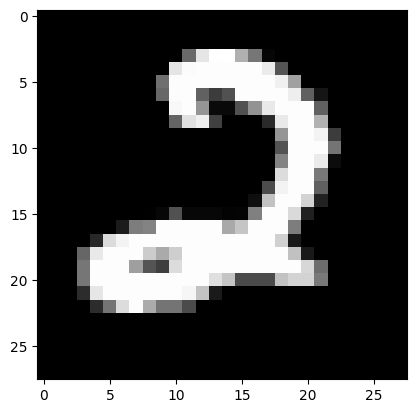

Prediction:  [2]
Label:  8


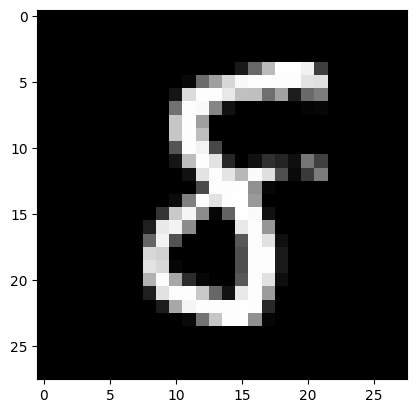

Prediction:  [9]
Label:  9


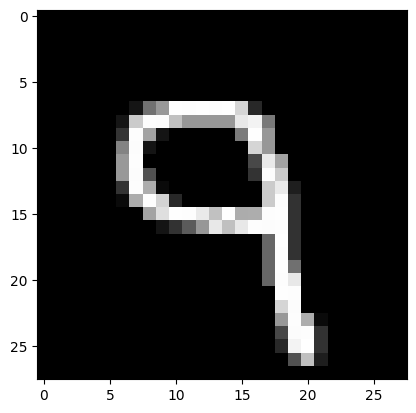

Prediction:  [4]
Label:  2


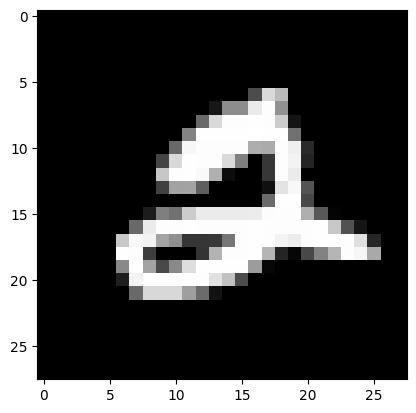

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 7 4 1 0 8 7 4 1 6 4 6 8 1 6 4 4 6 3 1 1 9 7 1 1 5 6 0 6 5 1 6 4 4 9 2 4
 7 5 8 3 6 6 8 6 7 8 1 6 7 7 0 7 3 2 3 6 2 1 0 4 3 0 7 0 0 5 1 4 9 8 6 3 7
 5 2 6 9 5 8 6 7 2 1 5 9 6 7 4 9 8 0 9 4 4 0 0 4 1 9 3 0 5 3 0 3 8 2 4 3 8
 8 8 9 9 7 5 4 1 7 2 0 6 8 7 1 8 0 9 6 3 9 6 8 6 9 7 0 0 9 9 7 7 2 9 6 7 3
 2 6 3 4 0 2 1 1 3 7 9 3 4 0 4 4 3 9 0 5 4 4 6 8 3 5 3 1 7 9 3 7 9 0 5 9 4
 1 7 2 3 0 1 0 7 0 7 3 6 4 1 8 6 1 1 0 3 7 3 2 2 3 8 0 2 3 1 5 7 5 1 4 4 3
 8 6 6 8 2 1 9 5 0 6 2 3 3 2 7 8 7 1 2 3 1 8 4 2 9 9 1 8 6 4 5 1 4 1 3 1 9
 0 7 1 3 5 6 0 2 4 1 4 9 1 9 5 1 4 3 3 4 4 0 6 2 8 1 1 9 1 0 1 3 4 1 9 4 6
 9 2 6 7 5 5 1 1 0 4 6 7 6 4 9 4 4 5 4 5 4 4 4 2 8 8 6 4 4 1 7 1 6 6 8 9 3
 4 0 6 6 4 9 5 4 3 1 2 7 2 0 6 2 3 3 9 0 6 2 3 7 0 0 6 9 4 9 9 7 4 9 7 1 4
 7 9 5 7 1 6 2 8 6 4 6 0 7 9 9 7 6 6 7 3 6 3 1 1 7 7 0 0 2 2 6 2 2 6 1 0 8
 3 8 3 1 5 7 3 8 0 3 7 5 9 0 1 6 5 4 3 2 1 0 0 5 5 6 8 7 2 9 9 9 1 6 5 9 0
 1 8 7 0 8 7 7 9 6 6 1 1 9 8 0 0 2 6 9 9 6 0 6 2 1 8 9 1 8 1 4 5 8 2 8 2 1
 5 7 3 8 0 7 8 3 3 8 5 6 

0.843